#### Attribute Information:
- Car Name – Name of the car
- Cyl – No of cylinders in the car – Multi-valued discrete
- Disp – Displacement – continuous
- Hp – Horsepower – continuous
- Wt – Weight – continuous
- Acc – Acceleration – continuous
- Yr – Model of the car – Multivalued discrete
- Mpg - Miles per gallon - continuous
 
#### Steps to follow:
1.	EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points
2.	Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the data-set) – 5 points
3.	Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)
4.	Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv('cars-dataset.csv') 
mpg_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


## 1. EDA & Pre-processing

In [4]:
mpg_df.shape

(398, 8)

In [5]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [6]:
# sample of data to drop if any missing values are there
print("Total missing values in database is = " + str(mpg_df.isnull().sum().sum()))

Total missing values in database is = 0


In [7]:
# finding the number of columns containing ?
print ((mpg_df.astype(str) != '?').all(axis=0))

car name     True
cyl          True
disp         True
hp          False
wt           True
acc          True
yr           True
mpg          True
dtype: bool


In [8]:
# drop rows containing ?
mpg_df = mpg_df.replace('?', np.nan)
mpg_df = mpg_df.dropna()

In [9]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null object
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 27.6+ KB


In [10]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [11]:
mpg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6


In [12]:
mpg_df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618
disp,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127
hp,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
wt,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244
acc,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329
yr,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000


 - As lighter cars would logically have better mpg. 
 - No of cylinders in the car,Displacement,Horsepower highly negatively correleted with mpg.
 - No of cylinders in the car highly correlated with Displacement,Horsepower and weight.

In [13]:
mpg_df_attr=mpg_df.iloc[: ,1:8]

## 2. Pair plot to visualize how the different variables are related

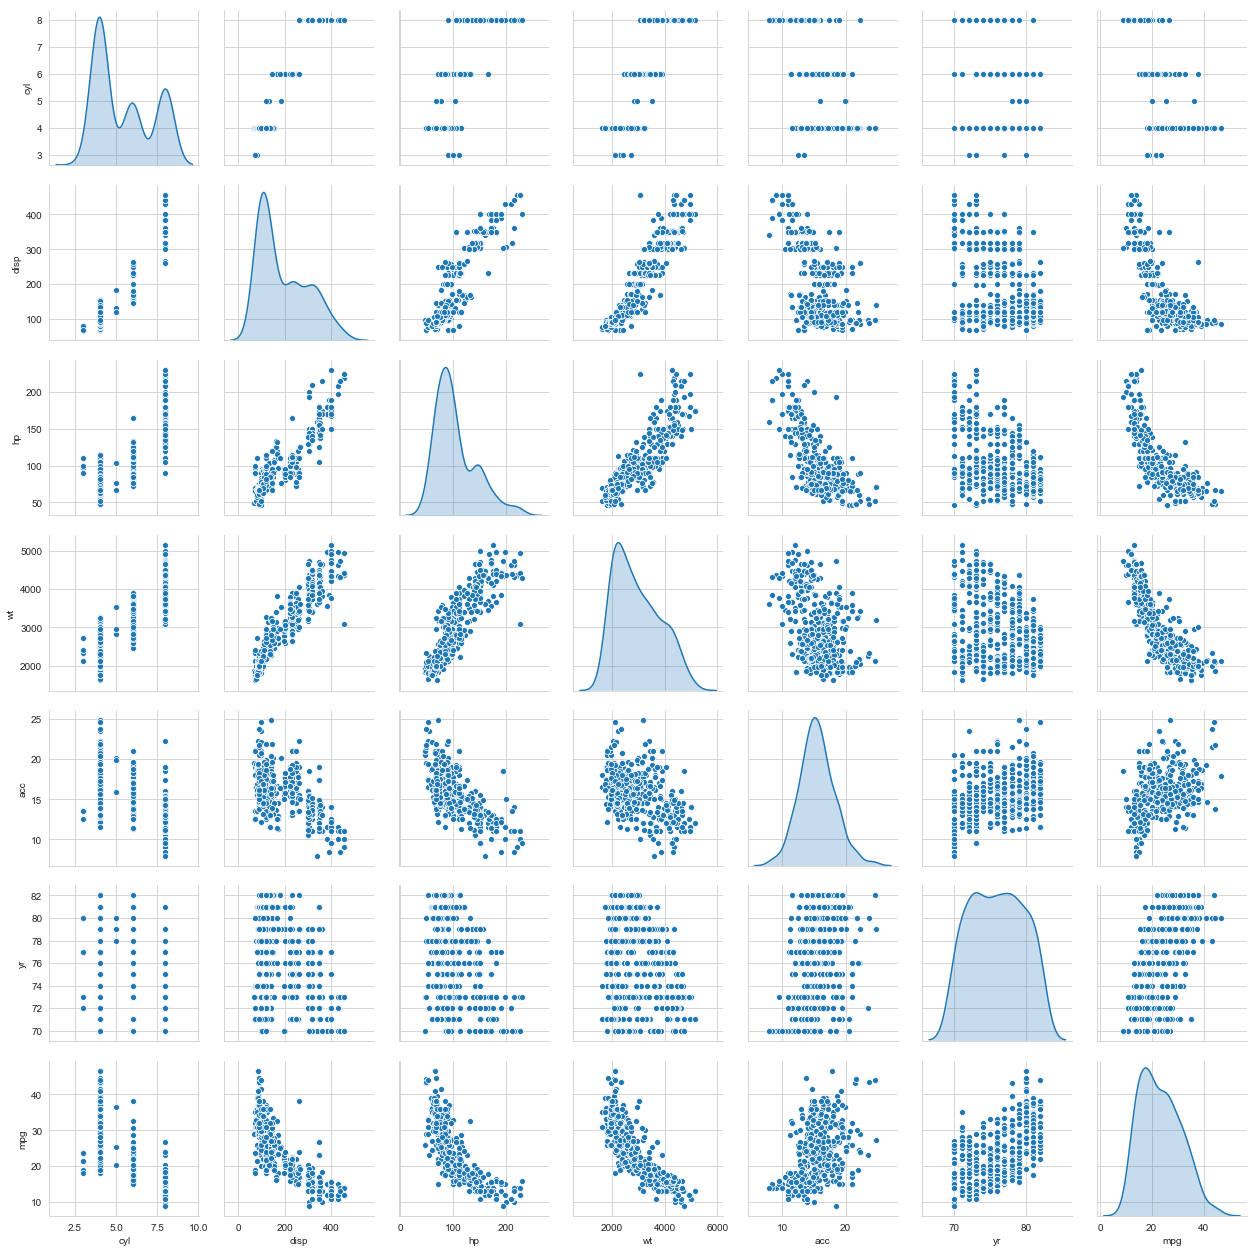

In [14]:
#pair plot to visualize how the different variables are related 
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(mpg_df_attr,diag_kind='kde');

- 'cyl' and 'dis'columns show three visible Gaussians (peeks)
- 'hp' columns two Gaussians (peeks) are visible 
- 'mpg' and 'wt' coulumn shows two Gaussians (peeks) but those are not clearly visible 
- 'acc' shows only one Gaussian (peek) so that column will not make much difference in clustering 
- 'cyl','dis' and 'hp columns' proves to be a good features for clustering
- From pair plot we can conclude that our car_mpg.csv data has minimum of three cluster as seen from 'cyl' column distribution 
- Maximum Nuber of gaussians can vary between 3 to 6 as two gaussian are also visible in 'hp' column distribution 

### correlation between different variables 
- The data distribution across various dimensions except 'Acc' do not look normal
- Close observation between 'mpg' and other attributes indicate the relationship is not really linear
- relation between 'mpg' and 'hp' show hetroscedacity... which will impact model accuracy
- How about 'mpg' vs 'yr' surprising to see a positive relation

### Standardizing the data

In [15]:
from scipy import stats
data_scaled = pd.DataFrame( stats.zscore(mpg_df_attr),columns=['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'])
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,-1.699321e-16,1.001278,-1.451004,-0.864014,-0.864014,1.483947,1.483947
disp,392.0,-2.537653e-16,1.001278,-1.209563,-0.855532,-0.415384,0.778276,2.493416
hp,392.0,-4.392745e-16,1.001278,-1.520975,-0.766593,-0.285349,0.560080,3.265452
wt,392.0,5.607759e-17,1.001278,-1.608575,-0.886854,-0.205211,0.751093,2.549061
acc,392.0,6.117555e-16,1.001278,-2.736983,-0.641055,-0.014999,0.538471,3.360262
yr,392.0,-9.754102e-16,1.001278,-1.625315,-0.809884,0.005547,0.820978,1.636410
mpg,392.0,-1.840931e-16,1.001278,-1.853218,-0.826925,-0.089277,0.712514,2.970359


## 3. K Means clustering to find out the optimal number of clusters in the data

In [16]:
from sklearn.cluster import KMeans


cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, init='k-means++')
    clusters.fit(data_scaled)
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
#combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:9]

,num_clusters,cluster_errors
0,1,2744.000000
1,2,1272.900760
2,3,928.617487
3,4,725.309400
4,5,654.625777
5,6,585.550298
6,7,533.930795
7,8,490.198048
8,9,446.874051


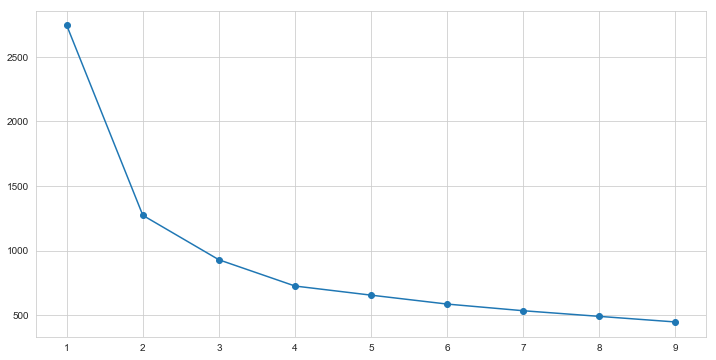

In [17]:
# Elbow plot to identify number of clusters

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

- we select that value of k where the gradiant reduces drastically 
- here in the elbow curve we can obsever that gradiant from k= 3 to k= 4 is changing at higher rate so in this k we will go with k= 3
- k= 3 we will select 

In [18]:
# Number of clusters
kmeans = KMeans(n_clusters=3)

# Fitting the input data
kmeans = kmeans.fit(data_scaled)

# Getting the cluster labels
labels = kmeans.predict(data_scaled)

# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids)

Centroid values
sklearn
[[ 0.3470398   0.2384915  -0.04424757  0.30335558  0.29291981  0.01126948
  -0.4725839 ]
 [ 1.48394702  1.48591152  1.49929313  1.38738246 -1.06597113 -0.66682598
  -1.15155766]
 [-0.86110766 -0.81098162 -0.6843036  -0.79514908  0.36356374  0.30830628
   0.76382895]]


### Identifying and separating the clusters

In [19]:
prediction=kmeans.predict(data_scaled)
data_scaled = pd.DataFrame(data_scaled)
data_scaled["GROUP"] = prediction


In [20]:
data_scaled.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,95,95,95,95,95,95,95
1,95,95,95,95,95,95,95
2,202,202,202,202,202,202,202


In [21]:
# Count the number of records per group to check the group symmetry 
df=data_scaled["GROUP"].value_counts()
df

2    202
1     95
0     95
Name: GROUP, dtype: int64

In [22]:
df0 = data_scaled.groupby('GROUP').get_group(0)
print("Group 0 size = ",df0.shape)
df0.head()

Group 0 size =  (95, 8)


,cyl,disp,hp,wt,acc,yr,mpg,GROUP
15,0.309967,0.034332,-0.246329,-0.170436,-0.014999,-1.625315,-0.185492,0
16,0.309967,0.043900,-0.194303,-0.239986,-0.014999,-1.625315,-0.698638,0
17,0.309967,0.053468,-0.506461,-0.460422,0.166467,-1.625315,-0.313779,0
24,0.309967,0.043900,-0.376395,-0.388515,-0.196464,-1.625315,-0.313779,0
32,0.309967,0.359658,-0.116263,-0.405018,-0.922327,-1.353505,-0.570352,0


In [23]:
df1 = data_scaled.groupby('GROUP').get_group(1)
print("Group 1 size = ",df1.shape)
df1.head()

Group 1 size =  (95, 8)


,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,1
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,1
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,1
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,1
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,1


In [24]:
df2 = data_scaled.groupby('GROUP').get_group(2)
print("Group 2 size = ",df2.shape)
df2.head()

Group 2 size =  (202, 8)


,cyl,disp,hp,wt,acc,yr,mpg,GROUP
14,-0.864014,-0.778984,-0.246329,-0.713864,-0.196464,-1.625315,0.071081,2
18,-0.864014,-0.932079,-0.428421,-0.999134,-0.377930,-1.625315,0.455941,2
19,-0.864014,-0.932079,-1.520975,-1.346881,1.799657,-1.625315,0.327654,2
20,-0.864014,-0.807690,-0.454435,-0.360223,0.710864,-1.625315,0.199368,2
21,-0.864014,-0.836395,-0.376395,-0.645494,-0.377930,-1.625315,0.071081,2


#### Visualisation of cluster


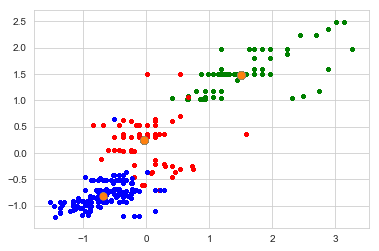

In [25]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(data_scaled.loc[data_scaled['GROUP'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 2], points[:, 1], s=7, c=colors[i])
        ax.scatter(centroids[:, 2], centroids[:, 1],marker='o',s=50)

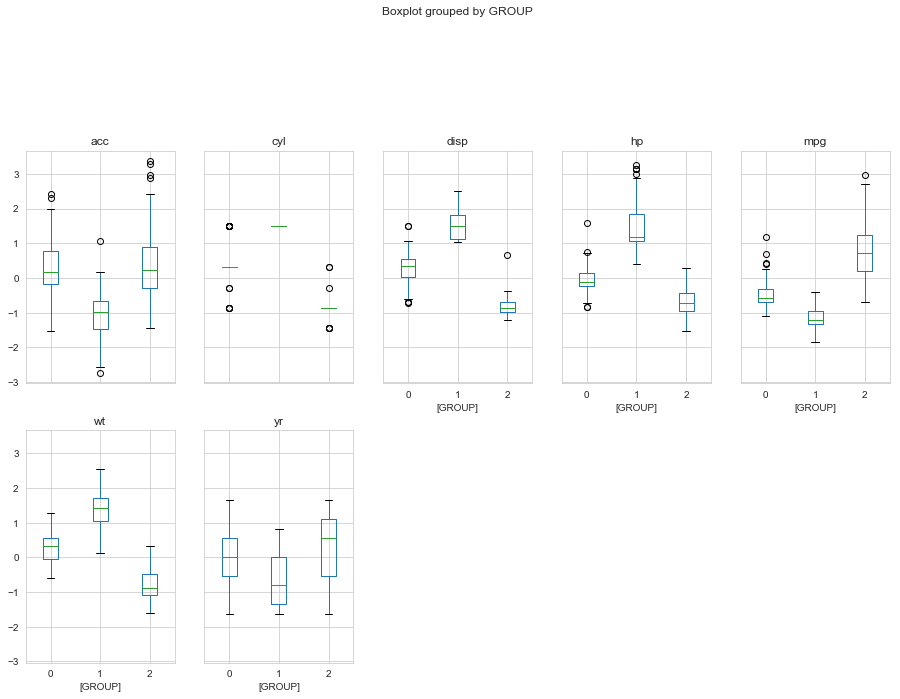

In [26]:
import matplotlib.pylab as plt
data_scaled.boxplot(by = 'GROUP',  layout=(5,5), figsize=(15, 25));

## 4. linear regression model on different clusters separately and print the coefficients of the models individually

### Group 0

In [27]:
df_0=data_scaled[data_scaled['GROUP']==0]
df_0.head()

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
15,0.309967,0.034332,-0.246329,-0.170436,-0.014999,-1.625315,-0.185492,0
16,0.309967,0.043900,-0.194303,-0.239986,-0.014999,-1.625315,-0.698638,0
17,0.309967,0.053468,-0.506461,-0.460422,0.166467,-1.625315,-0.313779,0
24,0.309967,0.043900,-0.376395,-0.388515,-0.196464,-1.625315,-0.313779,0
32,0.309967,0.359658,-0.116263,-0.405018,-0.922327,-1.353505,-0.570352,0


In [28]:
df_0.shape

(95, 8)

In [29]:
X_0 = df_0.drop(columns= 'GROUP', axis= 1)
y_0 = df_0['GROUP']

In [30]:
from sklearn.model_selection import train_test_split

X0_train,X0_test,y0_train,y0_test=train_test_split(X_0,y_0,test_size=0.3,random_state=15) 

In [31]:
from sklearn.linear_model import LinearRegression
lm0=LinearRegression() 
lm0.fit(X0_train,y0_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
data_train = pd.concat([X0_train, y0_train], axis=1)
data_train.head()


,cyl,disp,hp,wt,acc,yr,mpg,GROUP
304,0.309967,-0.204879,0.273935,-0.450991,-1.539310,0.820978,0.686857,0
152,0.309967,0.531890,-0.844632,0.535667,1.981123,-0.266263,-1.083498,0
247,1.483947,0.627574,0.143869,0.456687,-0.014999,0.549168,-0.454894,0
314,0.309967,0.292679,-0.376395,0.475548,1.146381,1.092789,-0.557523,0
226,0.309967,0.531890,-0.168289,0.645295,1.255261,0.277358,-0.634495,0


### Coefficients of the models(Group 0)

In [33]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr', data = data_train).fit()
lm1.params

Intercept   -0.356924
cyl          0.158686
disp        -0.004700
hp           0.040242
wt          -0.459281
acc         -0.081067
yr           0.235875
dtype: float64

### Group 1

In [34]:
df_1=data_scaled[data_scaled['GROUP']==1]
df_1.head()

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,1
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,1
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,1
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,1
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,1


In [35]:
df_1.shape

(95, 8)

In [36]:
X_1 = df_1.drop(columns= 'GROUP', axis= 1)
y_1 = df_1['GROUP']

In [37]:
from sklearn.model_selection import train_test_split

X1_train,X1_test,y1_train,y1_test=train_test_split(X_1,y_1,test_size=0.3,random_state=15) 

In [38]:
from sklearn.linear_model import LinearRegression
lm1=LinearRegression() 
lm1.fit(X1_train,y1_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
data_train1 = pd.concat([X1_train, y1_train], axis=1)
data_train1.head()


,cyl,disp,hp,wt,acc,yr,mpg,GROUP
229,1.483947,1.967153,2.224924,1.588337,-1.212672,0.277358,-1.019355,1
66,1.483947,2.244637,2.693162,1.951408,-1.648189,-1.081695,-1.596645,1
135,1.483947,1.488732,1.184397,2.029209,-0.377930,-0.538074,-1.340071,1
248,1.483947,1.182542,0.924265,0.892844,-0.849741,0.549168,-0.519037,1
123,1.483947,1.488732,1.964792,0.809149,-1.648189,-0.809884,-1.596645,1


### Coefficients of the models(Group 1)

In [40]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr', data = data_train1).fit()
lm1.params

Intercept   -0.257672
cyl         -0.382371
disp        -0.088911
hp          -0.078602
wt          -0.121368
acc         -0.185963
yr           0.180238
dtype: float64

### Group 2

In [41]:
df_2=data_scaled[data_scaled['GROUP']==2]
df_2.head()

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
14,-0.864014,-0.778984,-0.246329,-0.713864,-0.196464,-1.625315,0.071081,2
18,-0.864014,-0.932079,-0.428421,-0.999134,-0.377930,-1.625315,0.455941,2
19,-0.864014,-0.932079,-1.520975,-1.346881,1.799657,-1.625315,0.327654,2
20,-0.864014,-0.807690,-0.454435,-0.360223,0.710864,-1.625315,0.199368,2
21,-0.864014,-0.836395,-0.376395,-0.645494,-0.377930,-1.625315,0.071081,2


In [42]:
df_2.shape

(202, 8)

In [43]:
X_2 = df_2.drop(columns= 'GROUP', axis= 1)
y_2 = df_2['GROUP']

In [44]:
from sklearn.model_selection import train_test_split

X2_train,X2_test,y2_train,y2_test=train_test_split(X_2,y_2,test_size=0.3,random_state=15) 

In [45]:
from sklearn.linear_model import LinearRegression
lm2=LinearRegression() 
lm2.fit(X2_train,y2_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
data_train2 = pd.concat([X2_train, y2_train], axis=1)
data_train2.head()


,cyl,disp,hp,wt,acc,yr,mpg,GROUP
57,-0.864014,-0.927295,-0.636527,-1.003850,0.529398,-1.081695,0.199368,2
216,-0.864014,-1.104311,-1.208817,-1.358669,1.110088,0.277358,1.610521,2
352,-0.864014,-0.721574,-0.116263,-0.427415,-0.269051,1.364599,1.212832,2
370,-0.864014,-0.989490,-0.948685,-1.122909,0.964916,1.636410,1.738807,2
173,-0.864014,-0.999058,-0.896659,-1.226643,-0.559396,-0.266263,0.712514,2


### Coefficients of the models(Group 2)

In [47]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr', data = data_train2).fit()
lm2.params

Intercept    1.077055
cyl          2.203521
disp        -1.271669
hp          -0.296625
wt          -0.284843
acc          0.039992
yr           0.429782
dtype: float64